In [139]:
import torch 
import torch.nn as nn 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [140]:
RANDOME_SEED = 45 
torch.manual_seed(RANDOME_SEED)


TV = torch.rand(9)
RADIO = torch.rand(9)
NEWSPAPER = torch.rand(9)

t0,t1, t2, t3 = torch.rand(4)

sales = t0*t1*TV  + t2*RADIO + t3*NEWSPAPER


In [141]:
features = torch.hstack((TV,RADIO,NEWSPAPER))
 
features = features.reshape(9,3)
features.shape,sales.shape


(torch.Size([9, 3]), torch.Size([9]))

In [142]:
X_train,X_test,Y_train,Y_test = train_test_split(features,
                                                 sales,
                                                 test_size=0.3,
                                                 random_state=RANDOME_SEED
                                                 )

In [143]:
class LinearRegression(nn.Module) :
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,1)

    def forward(self,x) :
        return self.linear(x)

In [144]:
model = LinearRegression()
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr = 0.01)

In [145]:
epochs = 1000
losses = []
for numbers in range(epochs) :
    model.train()
    optimizer.zero_grad()
    prediction = model(X_train)
    prediction = prediction.view(-1)  # reshaping prediction to match the input 
    loss = loss_function(prediction,Y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

In [169]:
def visualization(training_data = X_train,
                  training_labels = Y_train,
                  testing_data = X_test,
                  testing_labels = Y_test,
                  inference = None) :
    
    plt.figure(figsize=(10,5))       

    plt.scatter(training_data,training_labels, c = "green" , label = "Trainning data")
    plt.scatter(testing_data,testing_labels, c = "red" , label = "Trainning data")
    plt.grid(True,linestyle = "--")

    if inference is not None :
        plt.scatter(0,inference, c = "y", label = "Inference")

X_train = X_train.reshape(-1)[:6]
Y_train = Y_train.reshape(-1)
X_test = X_test.reshape(-1)[:3]
Y_test = Y_test.view(-1)
X_train.shape,Y_train.shape

(torch.Size([6]), torch.Size([6]))

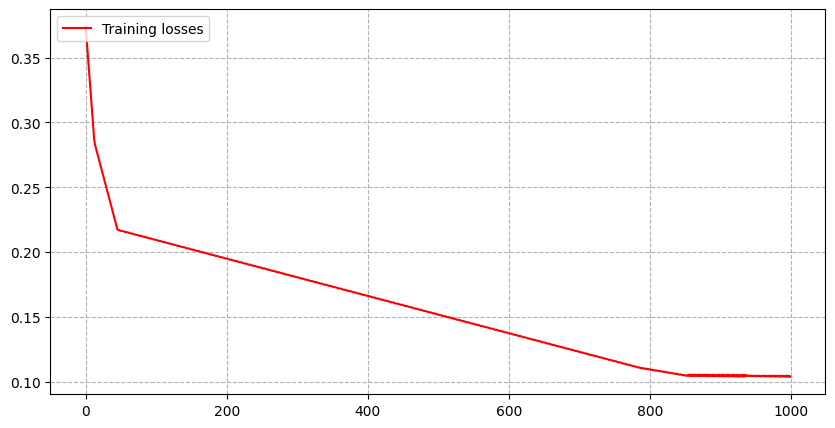

In [167]:
def Train_loss_Visualization() :
    plt.figure(figsize=(10,5))
    plt.plot(losses, c = "red", label="Training losses")
    plt.grid(True,linestyle = "--")
    plt.legend(loc="upper left")

Train_loss_Visualization()

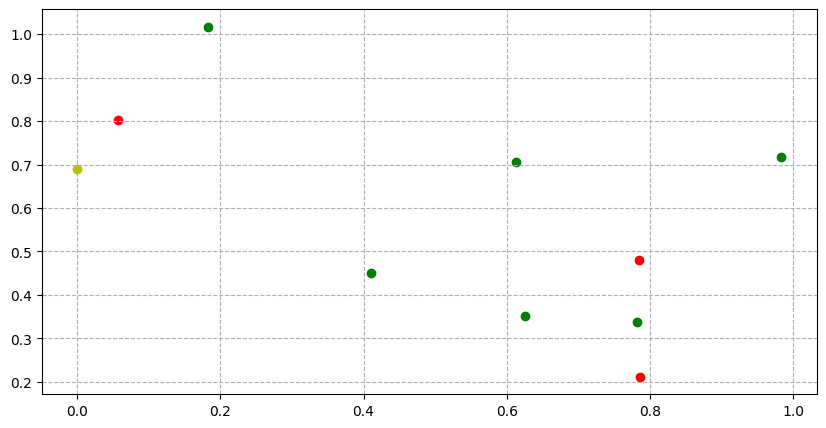

In [170]:
with torch.inference_mode():
    inference = model(X_test)

visualization(inference= inference)